<a href="https://colab.research.google.com/github/AntoineMLD/BTV/blob/Antoine/yolov9_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 30.2/201.2 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oIOleDi9O0JyI0dhQhYO")
project = rf.workspace("imeefyp").project("swimming-pools-dctlb")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
from ultralytics import YOLO

# Charger le modèle pré-entrainé
model = YOLO("/content/yolov8x.pt")

# Entraîner le modèle
results = model.train(data="/content/Swimming-Pools-2/data.yaml", epochs=150, imgsz=640, device=0)


New https://pypi.org/project/ultralytics/8.2.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8x.pt, data=/content/Swimming-Pools-2/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visual

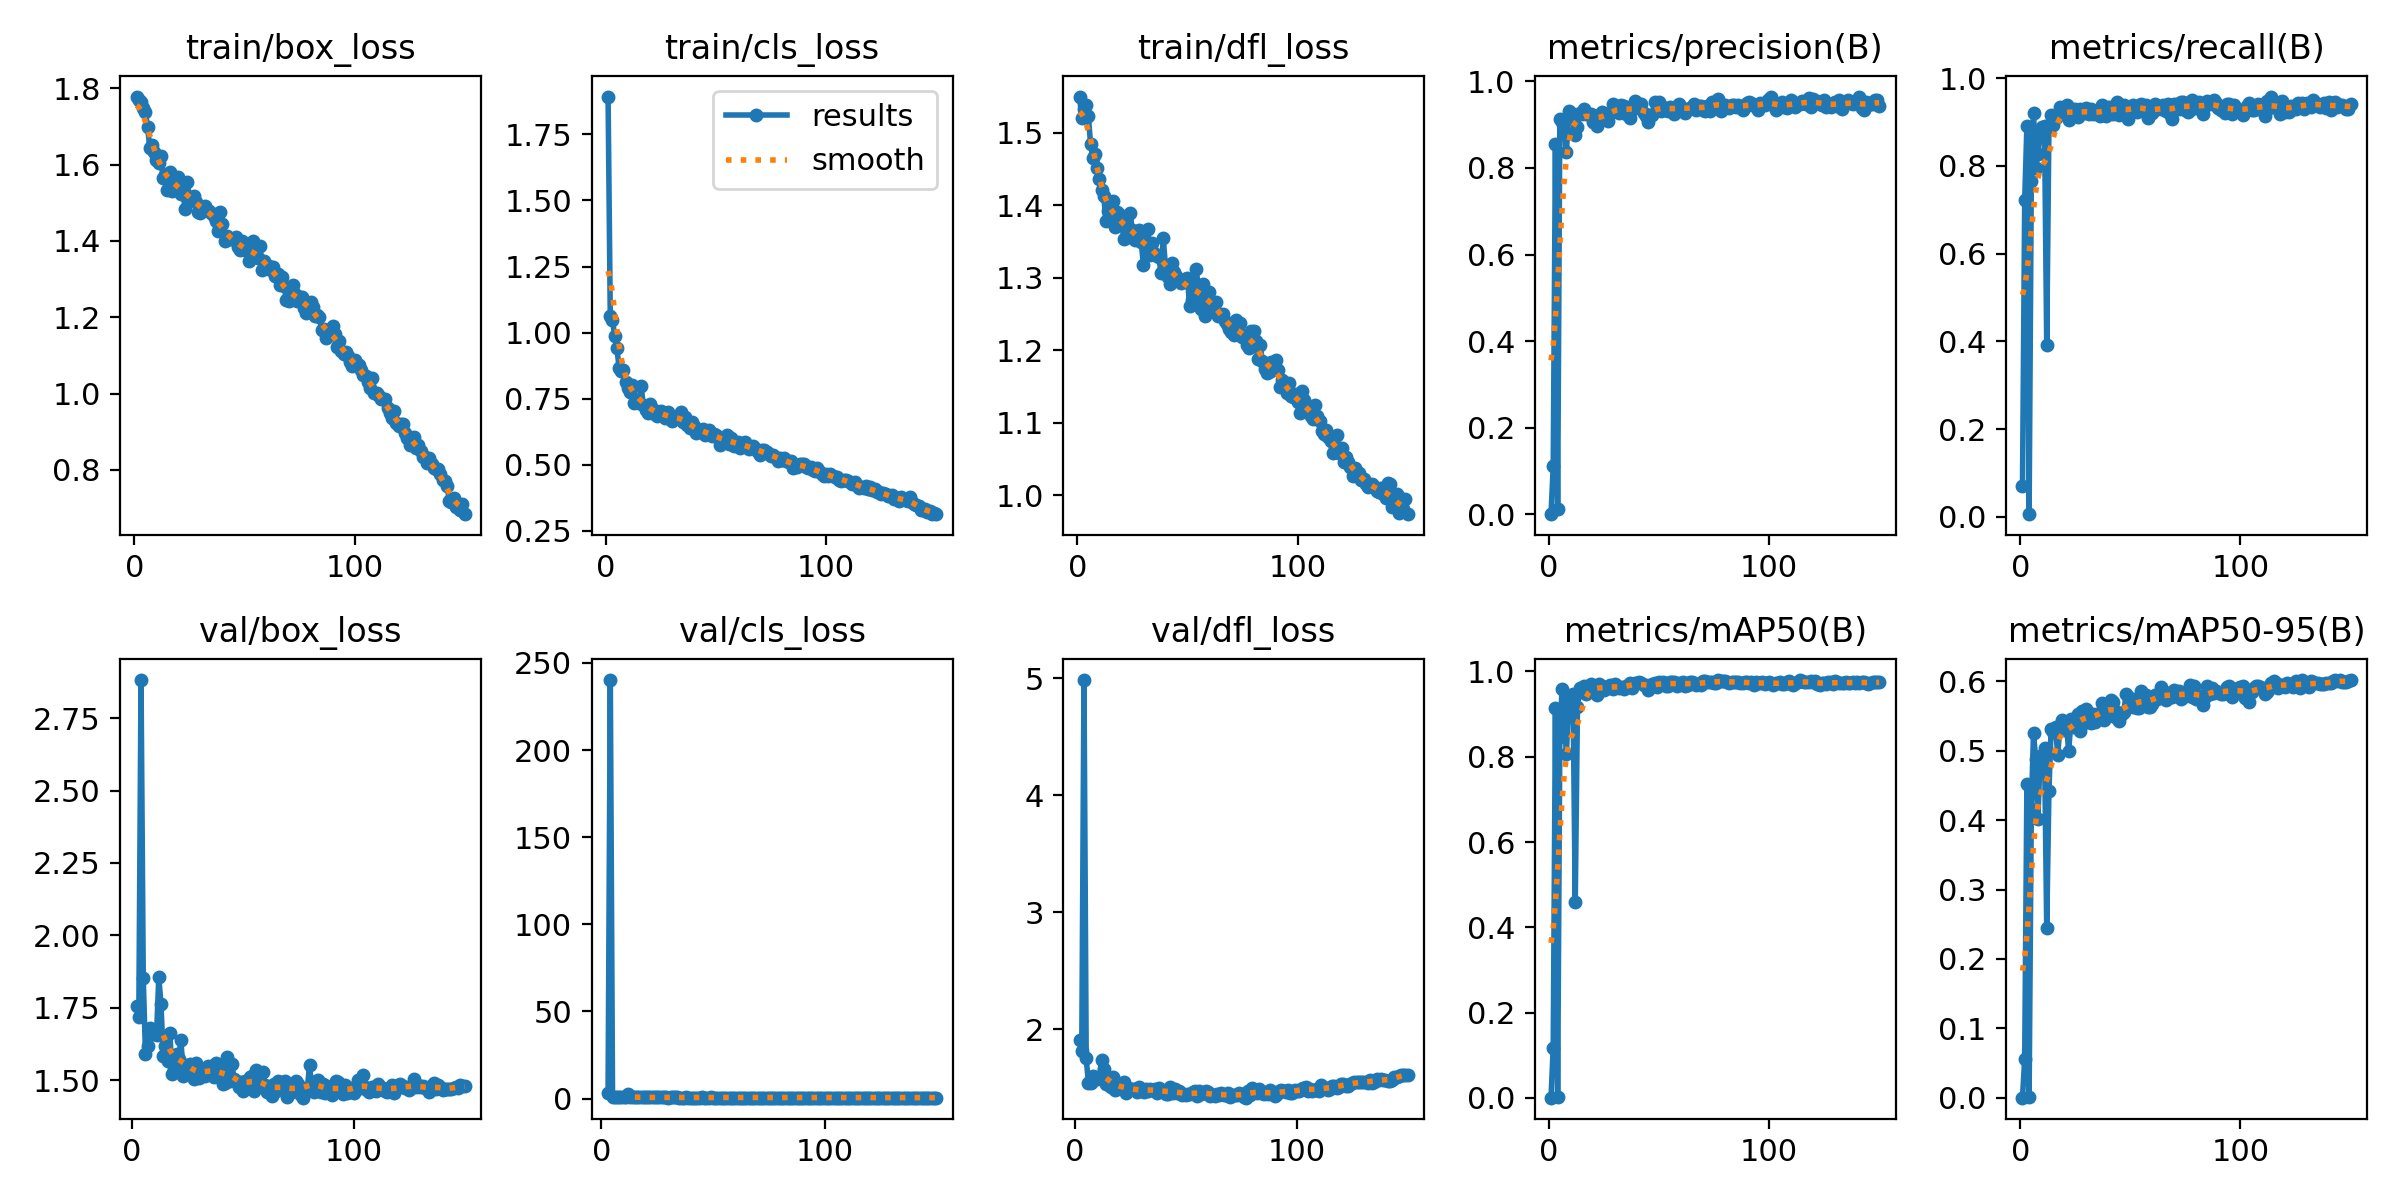

In [8]:

from IPython.display import display, Image

Image(filename='runs/detect/train4/results.png', width=800)

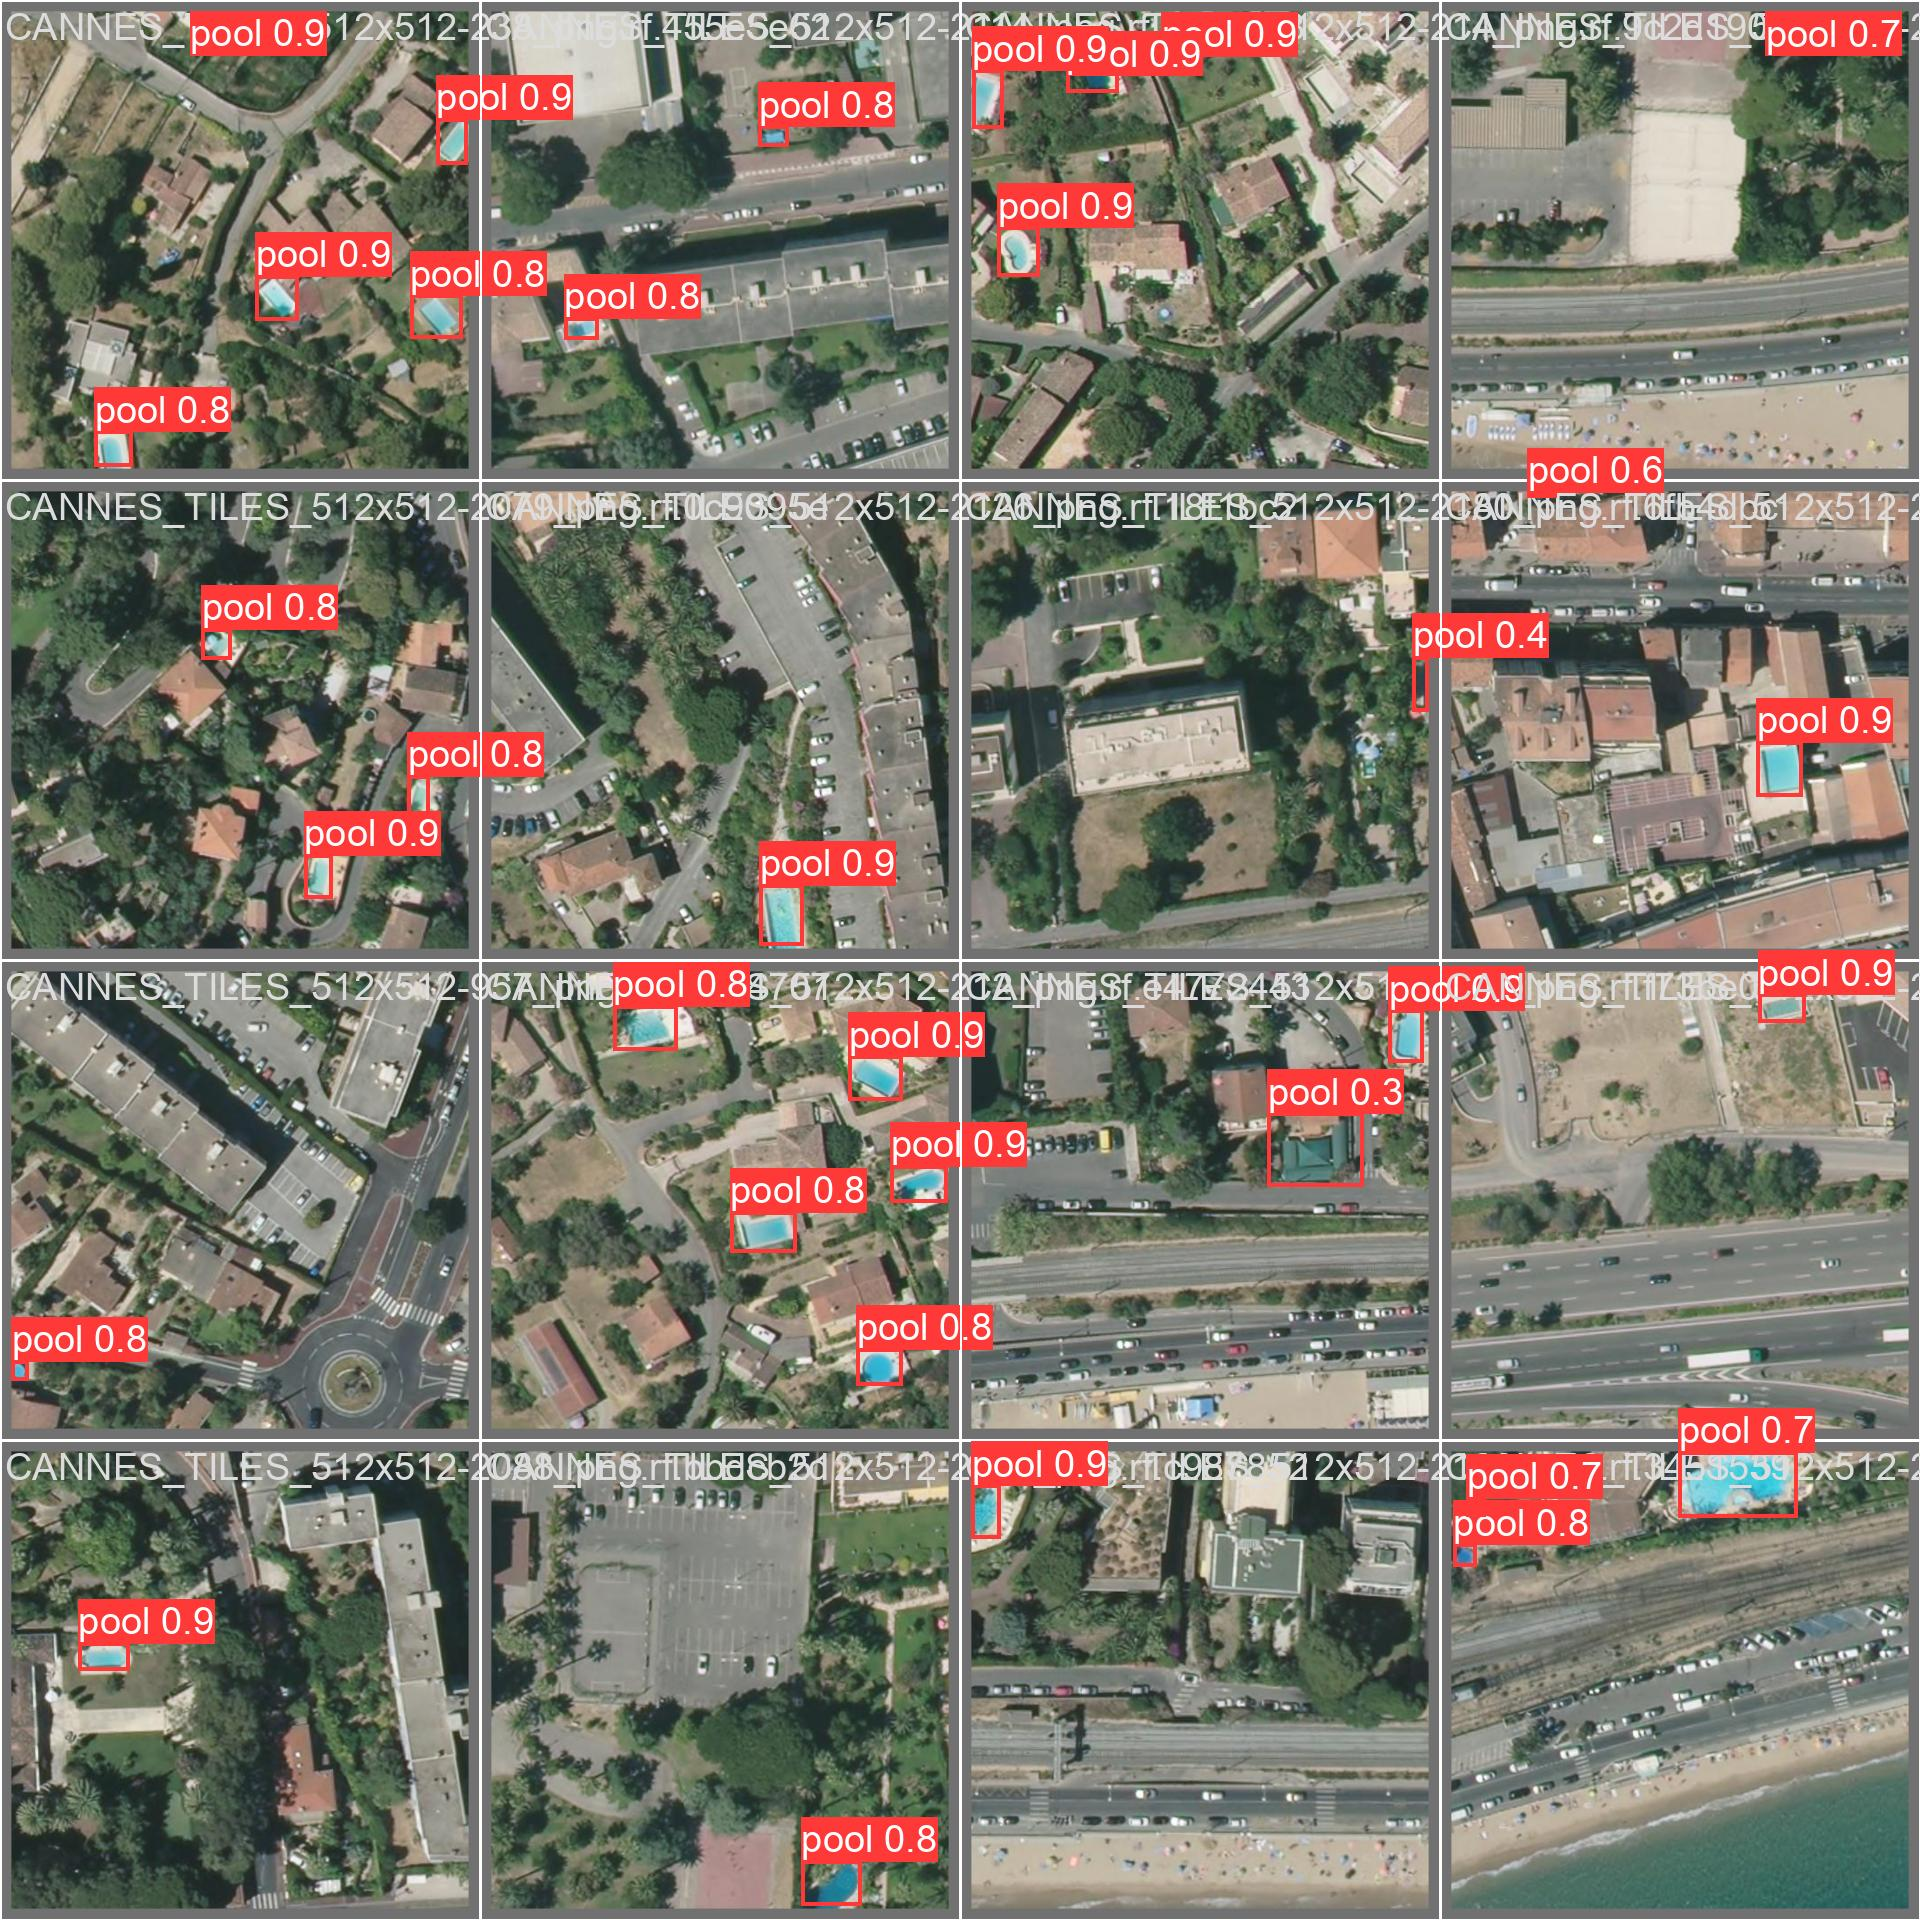

In [9]:

from IPython.display import display, Image

Image(filename='runs/detect/train4/val_batch1_pred.jpg', width=800)

In [10]:
from ultralytics import YOLO

# Charger le modèle
model = YOLO('/content/runs/detect/train4/weights/best.pt')

# Afficher les métriques
metrics = model.val()
print(metrics)


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/Swimming-Pools-2/valid/labels.cache... 255 images, 0 backgrounds, 0 corrupt: 100%|██████████| 255/255 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/16 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.79it/s]
                   all        255        697    

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a662f98d0f0>
fitness: 0.637298851320188
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.59997])
names: {0: 'pool'}
plot: True
results_dict: {'metrics/precision(B)': 0.9399794434416123, 'metrics/recall(B)': 0.9411764705882353, 'metrics/mAP50(B)': 0.9732814645257882, 'metrics/mAP50-95(B)': 0.5999674498528991, 'fitness': 0.637298851320188}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.1472155253092448, 'inference': 8.475924473182827, 'loss': 0.0013744129854090074, 'postprocess': 8.473972245758654}


In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Charger le modèle entraîné
model = YOLO("/content/runs/detect/train4/weights/best.pt")

# Chemin de l'image de test
image_path = "/content/Swimming-Pools-2/test/images/P0494_png.rf.0e2b276eb53c757bfd05c8a1a8b7a642.jpg"

# Faire une prédiction sur l'image de test
results = model.predict(image_path)

print(results)

# Compter le nombre de piscines détectées
num_pools = len(results)

print(f"Nombre de piscines détectées : {num_pools}")


image 1/1 /content/Swimming-Pools-2/test/images/P0494_png.rf.0e2b276eb53c757bfd05c8a1a8b7a642.jpg: 480x640 12 pools, 165.6ms
Speed: 3.2ms preprocess, 165.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'pool'}
orig_img: array([[[61, 79, 72],
        [60, 78, 71],
        [60, 78, 71],
        ...,
        [40, 55, 47],
        [46, 56, 50],
        [42, 51, 48]],

       [[64, 82, 75],
        [62, 80, 73],
        [61, 79, 72],
        ...,
        [41, 56, 48],
        [38, 48, 42],
        [35, 44, 41]],

       [[65, 83, 76],
        [64, 82, 75],
        [62, 80, 73],
        ...,
        [44, 59, 51],
        [34, 44, 38],
        [31, 41, 35]],

       ...,

       [[10, 14, 15],
        [14, 18, 19],
        [19, 23, 24],
        ...,
        [51, 72, 70],
        [42, 60, 59],
        [42, 60, 59]],

       [[14, 18, 19],
        [18, 22, 23],
        [22, 26, 27],
        ...,
        [50, 71, 69],
        [45, 63, 62],
        [45, 63, 62]],

       [[15, 19, 20],
        [20, 24, 25],
        [24, 28, 29],
        ...,
        